# Plot spindle current versus temperature

We want to visualize the relationship between the current and the temperature of the spindle. In order to do that, we want to take averages by given time slots. 

In [1]:
import os
import sys
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

current_folder = os.getcwd()
print(current_folder)

/Users/opatiny/git/opatiny/predictiveMaintenance/src/notebooks


## Load data

   

In [2]:
from utils.getFormattedSignalData import getFormattedSignalData

folderPath = "../../data/Mecatis/Warmup_Mecatis_05_02_25/"

temperature = "lrSigSpindleTemp.csv"
current = "stSigAxCurrentS.csv"

tempPath = current_folder + "/" + folderPath + temperature
currentPath = current_folder + "/" + folderPath + current


temperatureData = getFormattedSignalData(tempPath, normalize=True, debug=True)
currentData = getFormattedSignalData(currentPath, normalize=True, debug=True)


TEST
getFormattedSignalData - Number of points to sort:  4272
removeDuplicates - Number duplicates: 1038
getFormattedSignalData - Number of points after sort:  3234
               timestamp     value  timeSeconds
0     133832136244326000  0.462656       0.0000
1     133832136248982000  0.462656       0.4656
2     133832136253646000  0.462656       0.9320
4     133832136260638000  0.462656       1.6312
5     133832136265454000  0.464730       2.1128
...                  ...       ...          ...
4266  133832152756102000       NaN    1651.1776
4267  133832152760742000       NaN    1651.6416
4268  133832152767734000       NaN    1652.3408
4270  133832152772422000       NaN    1652.8096
4271  133832152777086000       NaN    1653.2760

[3234 rows x 3 columns]
getFormattedSignalData - Number of points after normalization:  3234
TEST
getFormattedSignalData - Number of points to sort:  2065466
removeDuplicates - Number duplicates: 0
getFormattedSignalData - Number of points after sort:  20654

## Plot the data

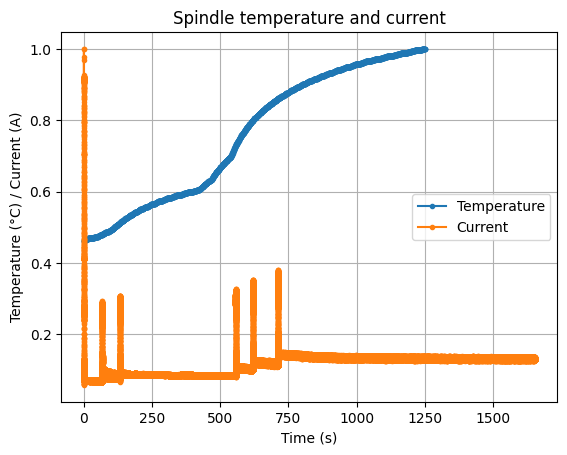

In [3]:
plt.plot(
    temperatureData.loc[:, "timeSeconds"], temperatureData.loc[:, "value"], "o-", markersize=3)
plt.plot(
    currentData.loc[:, "timeSeconds"], currentData.loc[:, "value"], "o-", markersize=3)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C) / Current (A)")
plt.legend(["Temperature", "Current"])

plt.title("Spindle temperature and current")
plt.grid()

plt.show()

## Compute average values for slots

For the two signals, we want to define a time interval, and compute the average for each successive intervals.

In [4]:
import pandas as pd

def computeSlotsAverage(signal: pd.DataFrame, dt: float = 10) -> pd.DataFrame:
    """
    Compute the average of the signal in each slot.

    Parameters
    ----------
    signal (pd.DataFrame): The signal to process. It must have a "timeSeconds" column.
    dt (float, optional): The duration of each slot in seconds.
    """
    signal["slot"] = signal["timeSeconds"] // dt
    return signal.groupby("slot").mean()


# test the function with basic data
data = pd.DataFrame({"timeSeconds": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     "value": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

### Plot the data averaged by slots

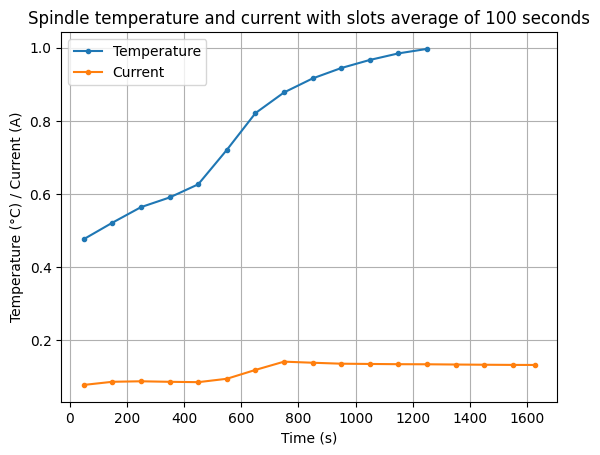

In [5]:
# apply the function to the temperature and current data
dt = 100 # seconds

temperatureSlots = computeSlotsAverage(temperatureData, dt)
currentSlots = computeSlotsAverage(currentData, dt)

# plot data versus time
plt.plot(
    temperatureSlots.loc[:, "timeSeconds"], temperatureSlots.loc[:, "value"], "o-", markersize=3)

plt.plot(
    currentSlots.loc[:, "timeSeconds"], currentSlots.loc[:, "value"], "o-", markersize=3)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C) / Current (A)")
plt.legend(["Temperature", "Current"])
plt.title("Spindle temperature and current with slots average of " + str(dt) + " seconds")
plt.grid()
plt.show()

### Plot the current versus temperature

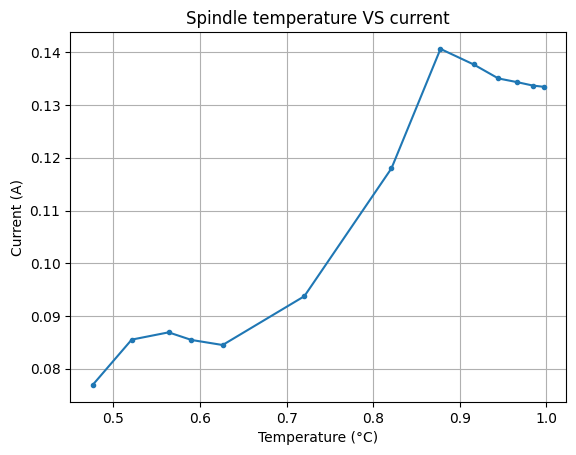

In [6]:
# plot current versus temperature
plt.plot(
    temperatureSlots.loc[:, "value"], currentSlots.loc[:, "value"], "-o", markersize=3)
plt.xlabel("Temperature (°C)")
plt.ylabel("Current (A)")
plt.title("Spindle temperature VS current")
plt.grid()
plt.show()